In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("Fish.csv")

In [5]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [6]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25,
                                                   random_state = 0)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형 회귀(Linear regression)

- 피쳐를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘

- 장점
    - 계수들에 대한 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음
    
- 단점
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
    - 이상치에 민감

In [10]:
lr = LinearRegression() # lr = 객체

In [11]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1228.52162131])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr 객체에 저장되어 있음

In [13]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[37.76648694] -659.8027258214022


- 회귀식 : 37.77 * Length2 -659.8
- coef_, intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름
- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것
- 선형 회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습**이라고 하고, KNN과 같이 모델 파라미터가 없이 훈련데이터를 저장하는 훈련 방법을 **사례 기반 학습** 이라고 함.

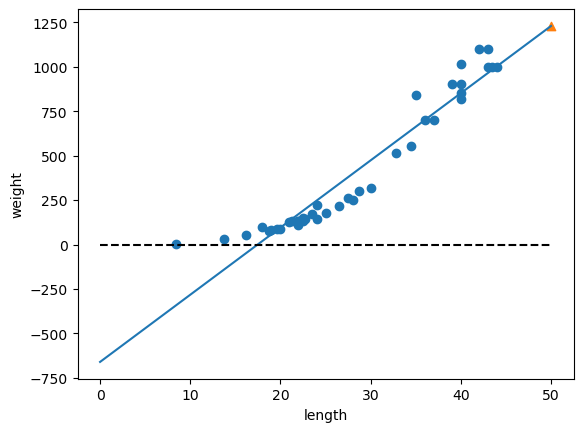

In [17]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.plot([0, 50], [0, 0], "k--")
plt.scatter(50, 1229, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [18]:
lr.score(x_test, y_test)

0.8803680435261592

In [19]:
pred = lr.predict(x_test)

In [20]:
mae = mean_absolute_error(y_test, pred)

In [21]:
mae

75.90442699616764

# 다항회귀

- 실제 농어의 무게는 일직선이라기보다는 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측하는 것이 더 적합
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습

In [23]:
df["squard", "Length2", ]

KeyError: 'squard'

In [ ]:
df.head()

In [24]:
x_tran, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]], df["Weight"], test_size = 0.25, random_state = 0)

KeyError: "['squared'] not in index"

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
lr.score(x_test, y_test)

0.8803680435261592

In [28]:
pred = lr.predict(x_test)

In [30]:
mae = mean_absolute_error(y_test, pred)

In [31]:
mae

75.90442699616764

In [33]:
lr.predict([[50, 2500]])

ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [34]:
print(lr.coef_, lr.intercept_)

[37.76648694] -659.8027258214022


- 회귀식 : -20.29 * Length2 + 0.99 * squared + 100.69

In [36]:
# 다항회귀 시각화
points = np.arange(0, 51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -20.29*points + 0.99*(points**2) + 100.69)
plt.scatter(50, 1570)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices